# generating models

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ""
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image
from keras.models import Model
from keras.applications.imagenet_utils import decode_predictions
import numpy as np
import cv2
from cv2 import *
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
from scipy.misc import toimage
import sys
sys.path.append("..")
from src.network.GoogleLenet import GoogLeNet

image_width = 75
image_height = 160
model_g = GoogLeNet.build(image_height, image_width, 3, 61)
model_g.summary()

ImageNet...
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 160, 75, 3)   0                                            
__________________________________________________________________________________________________
conv1_7x7_s2 (Conv2D)           (None, 80, 38, 64)   9472        input_1[0][0]                    
__________________________________________________________________________________________________
conv1_7x7_s2_bn (BatchNormaliza (None, 80, 38, 64)   256         conv1_7x7_s2[0][0]               
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 40, 19, 64)   0           conv1_7x7_s2_bn[0][0]            
_________________________________________________________________________________________________

In [4]:
for layer in model_g.layers:
    print(layer.name)

input_1
conv1_7x7_s2
conv1_7x7_s2_bn
max_pooling2d_1
conv2_3x3
conv2_3x3_bn
max_pooling2d_2
inception_3a_3x3_reduce
inception_3a5x5_reduce
inception_3a_3x3_reduce_bn
inception_3a5x5_reduce_bn
max_pooling2d_3
inception_3a_1x1
inception_3a_3x3
inception_3a_5x5
inception_3a_pool_proj
inception_3a_1x1_bn
inception_3a_3x3_bn
inception_3a_5x5_bn
inception_3a_pool_proj_bn
concatenate_1
inception_3b_3x3_reduce
inception_3b5x5_reduce
inception_3b_3x3_reduce_bn
inception_3b5x5_reduce_bn
max_pooling2d_4
inception_3b_1x1
inception_3b_3x3
inception_3b_5x5
inception_3b_pool_proj
inception_3b_1x1_bn
inception_3b_3x3_bn
inception_3b_5x5_bn
inception_3b_pool_proj_bn
concatenate_2
max_pooling2d_5
inception_4a_3x3_reduce
inception_4a5x5_reduce
inception_4a_3x3_reduce_bn
inception_4a5x5_reduce_bn
max_pooling2d_6
inception_4a_1x1
inception_4a_3x3
inception_4a_5x5
inception_4a_pool_proj
inception_4a_1x1_bn
inception_4a_3x3_bn
inception_4a_5x5_bn
inception_4a_pool_proj_bn
concatenate_3
inception_4b_3x3_reduc

In [12]:
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model

def model_from_layername(model, layer_name):
    model_extractfeatures = Model(inputs=model.input, outputs=model.get_layer(name=layer_name).output)
    x = model_extractfeatures.output
    x = GlobalAveragePooling2D()(x)
    #x = Dense(1024, activation = 'relu')(x)
    predictions = Dense(1, activation = 'sigmoid')(x)
    model_ret = Model(inputs=model_extractfeatures.input, outputs=predictions)
    for layer in model_ret.layers[:-2]:
        print(layer.name, ":", layer.trainable)
        layer.trainable = False
    return model_ret

model_low = model_from_layername(model_g, "concatenate_3")
model_low.summary()
for layer in model_low.layers:
    print(layer.name, ":", layer.trainable)
print("----------------------------------------------")
    
model_mid = model_from_layername(model_g, "concatenate_6")
model_mid.summary()
for layer in model_mid.layers:
    print(layer.name, ":", layer.trainable)
print("----------------------------------------------")
    
model_hig = model_from_layername(model_g, "concatenate_9")
model_hig.summary()
for layer in model_hig.layers:
    print(layer.name, ":", layer.trainable)
print("----------------------------------------------")

input_1 : False
conv1_7x7_s2 : False
conv1_7x7_s2_bn : False
max_pooling2d_1 : False
conv2_3x3 : False
conv2_3x3_bn : False
max_pooling2d_2 : False
inception_3a_3x3_reduce : False
inception_3a5x5_reduce : False
inception_3a_3x3_reduce_bn : False
inception_3a5x5_reduce_bn : False
max_pooling2d_3 : False
inception_3a_1x1 : False
inception_3a_3x3 : False
inception_3a_5x5 : False
inception_3a_pool_proj : False
inception_3a_1x1_bn : False
inception_3a_3x3_bn : False
inception_3a_5x5_bn : False
inception_3a_pool_proj_bn : False
concatenate_1 : False
inception_3b_3x3_reduce : False
inception_3b5x5_reduce : False
inception_3b_3x3_reduce_bn : False
inception_3b5x5_reduce_bn : False
max_pooling2d_4 : False
inception_3b_1x1 : False
inception_3b_3x3 : False
inception_3b_5x5 : False
inception_3b_pool_proj : False
inception_3b_1x1_bn : False
inception_3b_3x3_bn : False
inception_3b_5x5_bn : False
inception_3b_pool_proj_bn : False
concatenate_2 : False
max_pooling2d_5 : False
inception_4a_3x3_reduce 

inception_3a_1x1 : False
inception_3a_3x3 : False
inception_3a_5x5 : False
inception_3a_pool_proj : False
inception_3a_1x1_bn : False
inception_3a_3x3_bn : False
inception_3a_5x5_bn : False
inception_3a_pool_proj_bn : False
concatenate_1 : False
inception_3b_3x3_reduce : False
inception_3b5x5_reduce : False
inception_3b_3x3_reduce_bn : False
inception_3b5x5_reduce_bn : False
max_pooling2d_4 : False
inception_3b_1x1 : False
inception_3b_3x3 : False
inception_3b_5x5 : False
inception_3b_pool_proj : False
inception_3b_1x1_bn : False
inception_3b_3x3_bn : False
inception_3b_5x5_bn : False
inception_3b_pool_proj_bn : False
concatenate_2 : False
max_pooling2d_5 : False
inception_4a_3x3_reduce : False
inception_4a5x5_reduce : False
inception_4a_3x3_reduce_bn : False
inception_4a5x5_reduce_bn : False
max_pooling2d_6 : False
inception_4a_1x1 : False
inception_4a_3x3 : False
inception_4a_5x5 : False
inception_4a_pool_proj : False
inception_4a_1x1_bn : False
inception_4a_3x3_bn : False
inception_

In [14]:
model_low.save("../results/models/model_low.hdf5")
model_mid.save("../results/models/model_mid.hdf5")
model_hig.save("../results/models/model_hig.hdf5")

In [15]:
from keras.models import load_model
model_test = load_model("../results/models/model_low.hdf5")
model_test.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 160, 75, 3)   0                                            
__________________________________________________________________________________________________
conv1_7x7_s2 (Conv2D)           (None, 80, 38, 64)   9472        input_1[0][0]                    
__________________________________________________________________________________________________
conv1_7x7_s2_bn (BatchNormaliza (None, 80, 38, 64)   256         conv1_7x7_s2[0][0]               
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 40, 19, 64)   0           conv1_7x7_s2_bn[0][0]            
__________________________________________________________________________________________________
conv2_3x3 

/home/anhaoran/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:269: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


# Cluster

In [25]:
import numpy as np

attributes_list = ['accessoryHeadphone', 'personalLess15', 'personalLess30', 'personalLess45', 'personalLess60', 'personalLarger60', 'carryingBabyBuggy', 'carryingBackpack', 'hairBald', 'footwearBoots', 'lowerBodyCapri', 'carryingOther', 'carryingShoppingTro', 'carryingUmbrella', 'lowerBodyCasual', 'upperBodyCasual', 'personalFemale', 'carryingFolder', 'lowerBodyFormal', 'upperBodyFormal', 'accessoryHairBand', 'accessoryHat', 'lowerBodyHotPants', 'upperBodyJacket', 'lowerBodyJeans', 'accessoryKerchief', 'footwearLeatherShoes', 'upperBodyLogo', 'hairLong', 'lowerBodyLongSkirt', 'upperBodyLongSleeve', 'lowerBodyPlaid', 'lowerBodyThinStripes', 'carryingLuggageCase', 'personalMale', 'carryingMessengerBag', 'accessoryMuffler', 'accessoryNothing', 'carryingNothing', 'upperBodyNoSleeve', 'upperBodyPlaid', 'carryingPlasticBags', 'footwearSandals', 'footwearShoes', 'hairShort', 'lowerBodyShorts', 'upperBodyShortSleeve', 'lowerBodyShortSkirt', 'footwearSneakers', 'footwearStocking', 'upperBodyThinStripes', 'upperBodySuit', 'carryingSuitcase', 'lowerBodySuits', 'accessorySunglasses', 'upperBodySweater', 'upperBodyThickStripes', 'lowerBodyTrousers', 'upperBodyTshirt', 'upperBodyOther', 'upperBodyVNeck', 'footwear', 'hair', 'lowerbody', 'upperbody']
acc_features = np.load("../results/weighted_acc_features_for_all_attributes.npy")
print(acc_features.shape)

(61, 3)


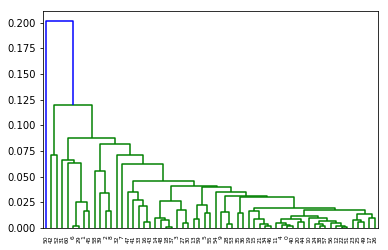

Original cluster by hierarchy clustering:
 [12  2  3  6 12  8  2 18  3  9 14 12 14  7  5 11  4 16  5 11 13 11 14 15
 14 15 16  6  9  2  6  2 19  4 11 10 10  5 14  3 12  4  1  4 13  2 11  4
  5 15 20 14  1  9 17  8 14 14  3  7  2]


In [26]:
import scipy
import scipy.cluster.hierarchy as sch
from scipy.cluster.vq import vq,kmeans,whiten
import matplotlib.pyplot as plt

#1. 层次聚类
#生成点与点之间的距离矩阵,这里用的欧氏距离:
disMat = sch.distance.pdist(acc_features,'euclidean') 
#进行层次聚类:
Z=sch.linkage(disMat,method='average') 
#将层级聚类结果以树状图表示出来并保存为plot_dendrogram.pn
P=sch.dendrogram(Z)
plt.show()
#根据linkage matrix Z得到聚类结果:
cluster= sch.fcluster(Z, t=1, criterion='inconsistent') 

print("Original cluster by hierarchy clustering:\n",cluster)

In [27]:
#使用kmeans函数进行聚类,输入第一维为数据,第二维为聚类个数k.
#有些时候我们可能不知道最终究竟聚成多少类,一个办法是用层次聚类的结果进行初始化.当然也可以直接输入某个数值. 
#k-means最后输出的结果其实是两维的,第一维是聚类中心,第二维是损失distortion,我们在这里只取第一维,所以最后有个[0]
centroid=kmeans(acc_features, 3)[0]#max(cluster)

#使用vq函数根据聚类中心对所有数据进行分类,vq的输出也是两维的,[0]表示的是所有数据的label
label=vq(acc_features, centroid)[0] 

print("Final clustering by k-means:\n",label)

Final clustering by k-means:
 [1 0 2 1 1 1 0 1 2 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 2 1 2 1 1 2 1 1 0 1 1 1 1 2 1 2 1 1 1 1 1 2 1 0]


In [28]:
levels = []
indexs = []
for i in range(3):
    levels.append(list())
    indexs.append(list())
for i in range(61):
    levels[label[i]].append(attributes_list[i])
    indexs[label[i]].append(i)
for level in levels:
    print(level)
print(indexs)

['personalLess15', 'carryingBabyBuggy', 'lowerBodyLongSkirt', 'lowerBodyPlaid', 'accessoryMuffler', 'lowerBodyShorts', 'upperBodyVNeck']
['accessoryHeadphone', 'personalLess45', 'personalLess60', 'personalLarger60', 'carryingBackpack', 'footwearBoots', 'lowerBodyCapri', 'carryingOther', 'carryingShoppingTro', 'carryingUmbrella', 'upperBodyCasual', 'personalFemale', 'carryingFolder', 'upperBodyFormal', 'accessoryHairBand', 'accessoryHat', 'lowerBodyHotPants', 'upperBodyJacket', 'lowerBodyJeans', 'accessoryKerchief', 'footwearLeatherShoes', 'upperBodyLogo', 'hairLong', 'upperBodyLongSleeve', 'lowerBodyThinStripes', 'carryingLuggageCase', 'personalMale', 'carryingMessengerBag', 'carryingNothing', 'upperBodyPlaid', 'carryingPlasticBags', 'footwearShoes', 'hairShort', 'upperBodyShortSleeve', 'lowerBodyShortSkirt', 'footwearSneakers', 'footwearStocking', 'upperBodySuit', 'lowerBodySuits', 'accessorySunglasses', 'upperBodySweater', 'upperBodyThickStripes', 'lowerBodyTrousers', 'upperBodyOther